## Coding Exercise #0301

### 1. Linear regression with 'Galton' data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
%matplotlib inline

#What Is This Exercise About?
#In this exercise, you will apply simple linear regression to the classical Galton’s data. Due to many repeated values, you will have to prepare the data in a suitable way in order to visualize correctly.

#### 1.1. Read in data and visualize:

In [2]:
# Go to the directory where the data file is located. 
# os.chdir(r'~/{directorypath}')                # Please, replace the path with your own. 

# Get current working directory
directory = os.getcwd()
print(f"Current directory: Before= {directory}")

#Below is another way to read the csv file in the directory
#df = pd.read_csv('C:\\Users\\prati\\SAMSUNG_AI\\Module4\\galton.csv') 

Current directory: Before= C:\Users\prati\SAMSUNG_AI\Module 4 - Intro to Machine Learning


In [3]:
df = pd.read_csv('galton.csv', header='infer')

In [4]:
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [5]:
# There are many repeated values.
# So, we summarize as a cross table.
myTable = pd.crosstab(df.midparentHeight,df.childHeight)
myTable

childHeight,56.0,57.0,57.5,58.0,59.0,60.0,60.1,60.5,61.0,61.2,...,73.0,73.2,73.5,74.0,74.2,75.0,76.0,76.5,78.0,79.0
midparentHeight,,,,,,,,,,,,,,,,,,,,,
64.40,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64.86,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
65.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65.27,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65.40,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72.91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73.61,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
73.66,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
# Transform the cross table so that it could be displyed as a Scatter plot. 
# Size of point = Frequency.
nrows = myTable.shape[0]
ncols = myTable.shape[1]
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

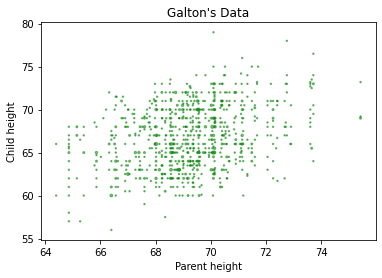

In [7]:
# Show the Scatter plot.
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

#### 1.2. Linear regression training:

In [8]:
# Instantiate a linear regression object.
lm = LinearRegression(fit_intercept=True)

In [9]:
# Train.
lm.fit(df[['midparentHeight']],df[['childHeight']])

LinearRegression()

In [10]:
# Show the intercept.
lm.intercept_

array([22.63624055])

In [11]:
# Show the slope.
lm.coef_

array([[0.6373609]])

#### 1.3. Visualization of the regression line:

In [12]:
# Predicted Y.
predY = lm.predict(df[['midparentHeight']])

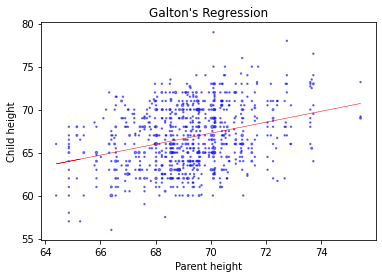

In [13]:
# Show the Scatter plot + Regression line.
plt.plot(df.midparentHeight.values,predY,c = 'red',linestyle='-',linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()